In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data/Processed/final_lstm_data.csv")

df['charttime'] = pd.to_datetime(df['charttime'])
df = df.sort_values(['stay_id', 'charttime'])
# irst sorts by stay_id
# → keeps one patient’s ICU stay together

# Then sorts by charttime
# → keeps records in correct time order
print(df.shape)
df.head()


(12069, 91)


,stay_id,charttime,dbp,gcs,heart_rate,resp_rate,sbp,spo2,temperature,subject_id,...,total_urine,mean_hourly_urine,min_hourly_urine,low_urine_flag,antibiotic_y,insulin_y,sedative_y,steroid,vasopressor_y,num_unique_drugs
0,30057454,2171-11-14 10:00:00,66.000000,5.0,104.166667,18.0,99.0,94.166667,43.0,10023117,...,100.0,100.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
1,30057454,2171-11-14 11:00:00,63.666667,5.0,102.333333,20.0,94.0,94.666667,43.0,10023117,...,100.0,100.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
2,30057454,2171-11-14 12:00:00,56.000000,5.0,103.000000,21.0,86.0,92.000000,43.0,10023117,...,100.0,100.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,30057454,2171-11-14 13:00:00,64.000000,5.0,108.000000,23.0,99.0,95.000000,43.0,10023117,...,100.0,100.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
4,30057454,2171-11-14 14:00:00,67.000000,5.0,105.000000,18.0,102.0,94.000000,43.0,10023117,...,100.0,100.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0


Class counts:
long_stay
1    7012
0    5057
Name: count, dtype: int64

Class proportion:
long_stay
1    0.580993
0    0.419007
Name: proportion, dtype: float64


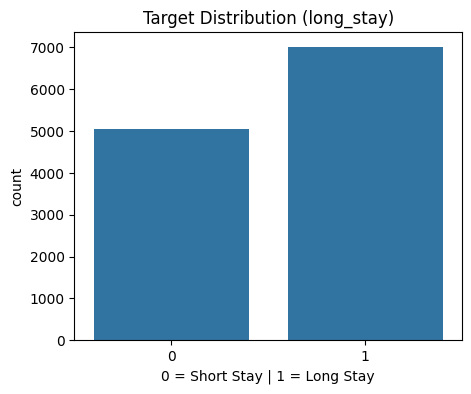

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

y = df['long_stay']

print("Class counts:")
print(y.value_counts())

print("\nClass proportion:")
print(y.value_counts(normalize=True))

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Target Distribution (long_stay)")
plt.xlabel("0 = Short Stay | 1 = Long Stay")
plt.show()


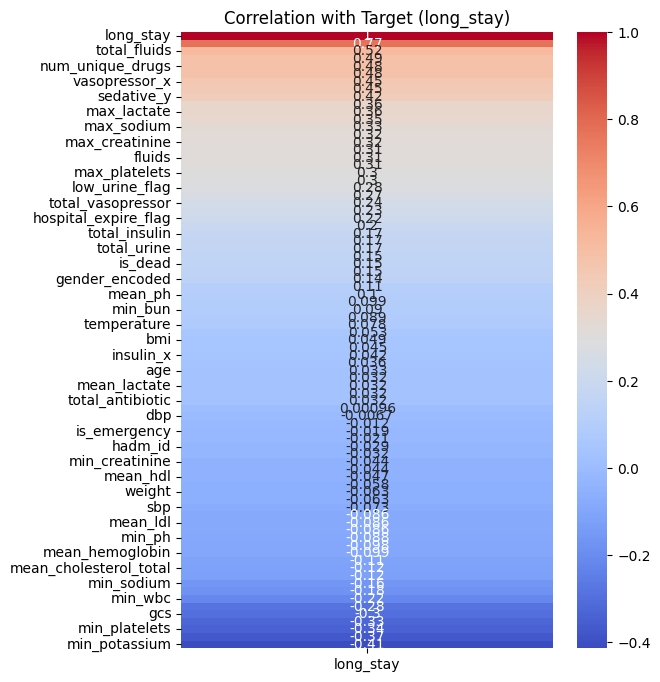

In [4]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(6,8))
sns.heatmap(
    corr[['long_stay']]
    .sort_values('long_stay', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation with Target (long_stay)")
plt.show()


In [5]:
vital_features = [
    'heart_rate',
    'sbp',              # Systolic Blood Pressure MAP not present → SBP acceptable
    'resp_rate', #Breaths per minute respiratory distress
    'temperature',
    'spo2',
    'mean_glucose',
    'mean_creatinine',
    'mean_bun',
    'mean_sodium',
    'mean_potassium',
    'mean_hemoglobin',
    'mean_wbc',
    'mean_hourly_urine',
    'vasopressor_x',
    'sedative_x',
    'insulin_x'
]

target = 'long_stay'


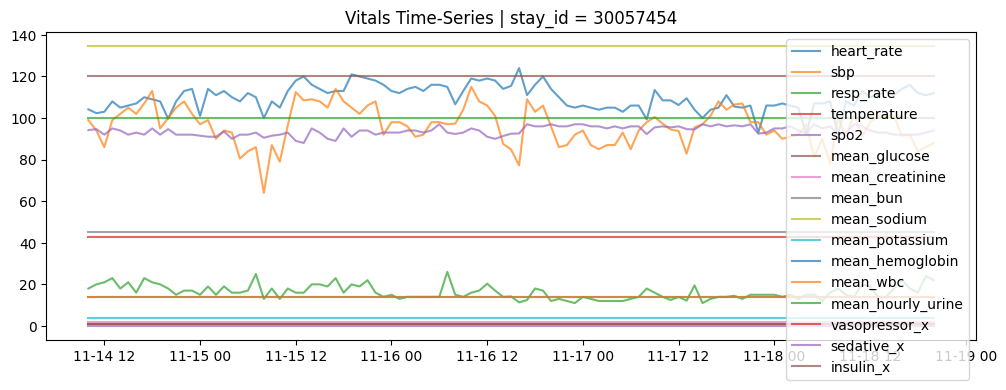

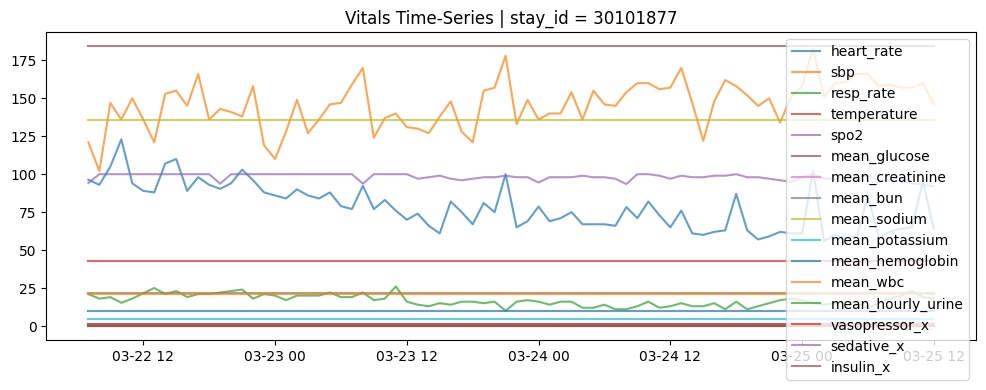

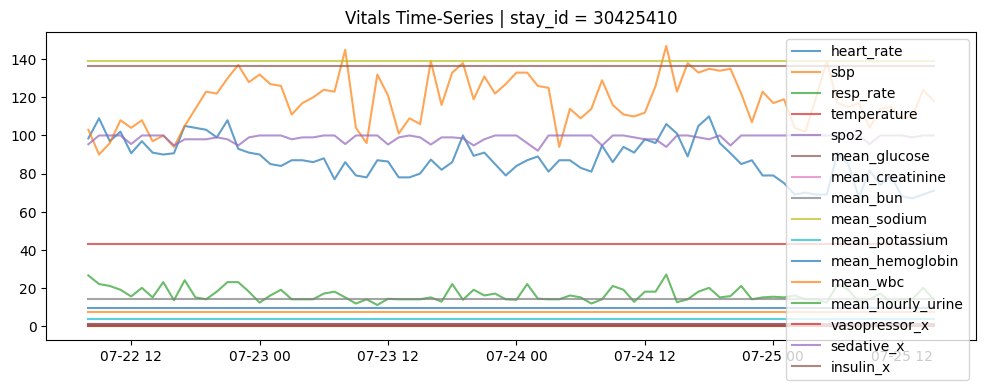

In [6]:
sample_stays = df['stay_id'].unique()[:3]
for stay in sample_stays:
    temp = df[df['stay_id'] == stay]
    
    plt.figure(figsize=(12,4))
    for v in vital_features:
        plt.plot(temp['charttime'], temp[v], label=v, alpha=0.7)
        
    plt.title(f"Vitals Time-Series | stay_id = {stay}")
    plt.legend()
    plt.show()


In [7]:
feature_cols = [
    'heart_rate','sbp','dbp','spo2',
    'resp_rate','temperature',
    'mean_creatinine','mean_bun',
    'mean_glucose','mean_wbc'
]

df[feature_cols].std().sort_values()


temperature         1.201547
mean_creatinine     1.462766
spo2                2.834881
resp_rate           5.406369
mean_wbc            5.767806
dbp                13.357433
heart_rate         17.636682
sbp                20.316252
mean_bun           24.349429
mean_glucose       46.300491
dtype: float64

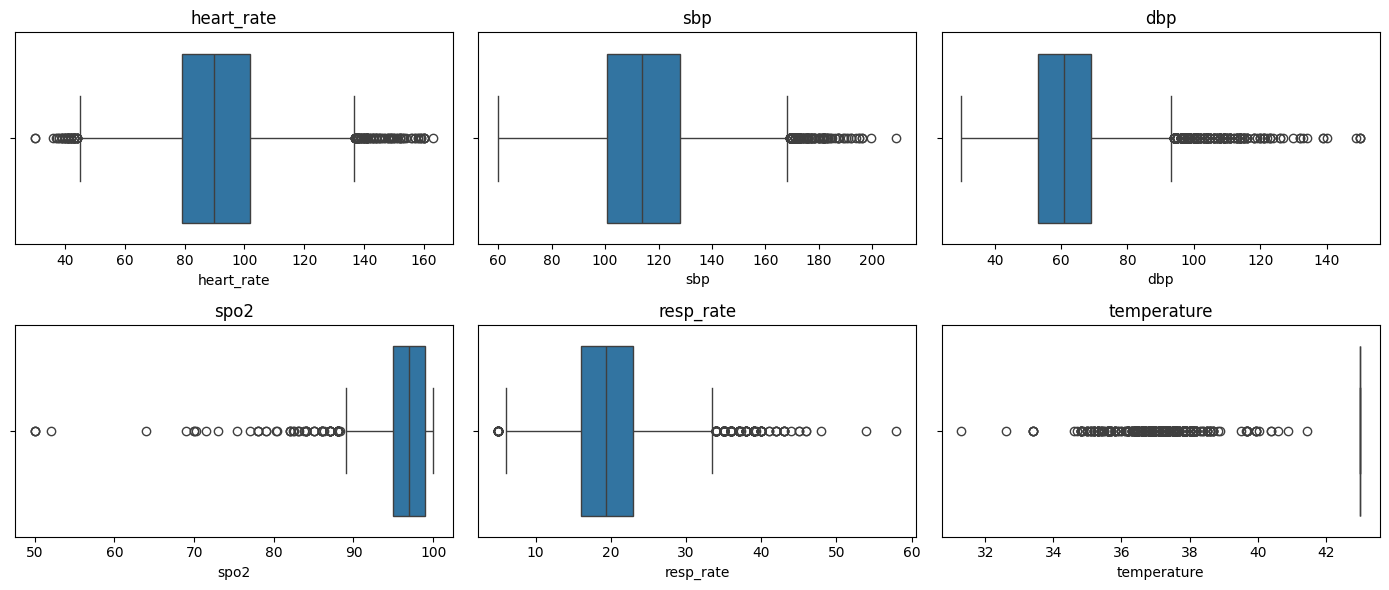

In [8]:
plt.figure(figsize=(14,6))
for i, col in enumerate(feature_cols[:6], 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


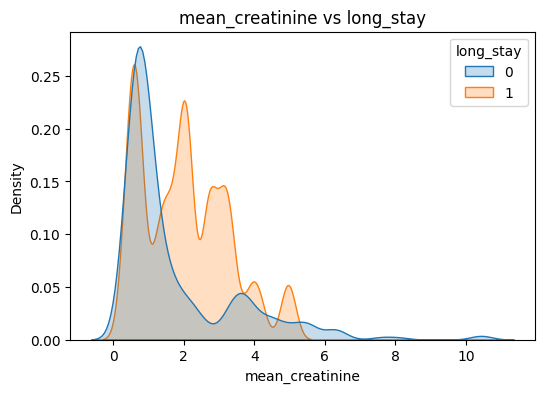

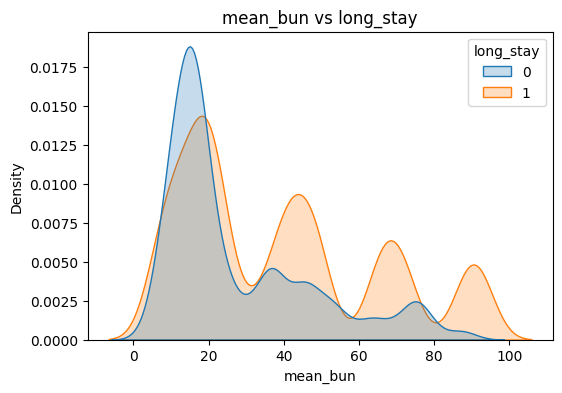

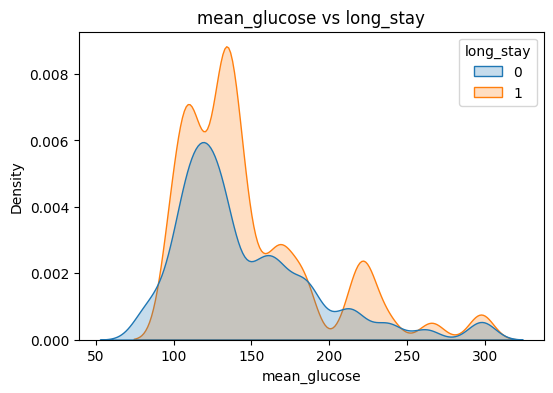

In [9]:
for col in ['mean_creatinine','mean_bun','mean_glucose']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(
        data=df,
        x=col,
        hue='long_stay',
        fill=True
    )
    plt.title(f"{col} vs long_stay")
    plt.show()


In [10]:
df.columns

Index(['stay_id', 'charttime', 'dbp', 'gcs', 'heart_rate', 'resp_rate', 'sbp',
       'spo2', 'temperature', 'subject_id', 'hadm_id', 'first_careunit',
       'last_careunit', 'los', 'long_stay', 'admission_type', 'is_emergency',
       'admission_location', 'discharge_location', 'insurance',
       'marital_status', 'race', 'hospital_los', 'ed_los',
       'hospital_expire_flag', 'age', 'age_group', 'gender_encoded', 'is_dead',
       'bmi', 'height', 'weight', 'max_bun', 'max_cholesterol_total',
       'max_creatinine', 'max_glucose', 'max_hdl', 'max_hemoglobin',
       'max_lactate', 'max_ldl', 'max_ph', 'max_platelets', 'max_potassium',
       'max_sodium', 'max_wbc', 'mean_bun', 'mean_cholesterol_total',
       'mean_creatinine', 'mean_glucose', 'mean_hdl', 'mean_hemoglobin',
       'mean_lactate', 'mean_ldl', 'mean_ph', 'mean_platelets',
       'mean_potassium', 'mean_sodium', 'mean_wbc', 'min_bun',
       'min_cholesterol_total', 'min_creatinine', 'min_glucose', 'min_hdl',
     

In [93]:
import pandas as pd
import numpy as np

df = df.copy()

TIME_COLS = ['stay_id', 'charttime']

VITAL_COLS = [
    'heart_rate', 'resp_rate',
    'temperature', 'spo2', 'gcs'
]

LAB_COLS = [
    'mean_glucose', 'mean_creatinine', 'mean_bun',
    'mean_sodium', 'mean_potassium',
    'mean_hemoglobin', 'mean_wbc', 'mean_lactate',
    'mean_ph',
    'mean_cholesterol_total',
    # 'mean_hdl',
    # 'mean_ldl'
    'total_fluids'
]

TREATMENT_COLS = [
    'vasopressor_x', 'sedative_x',
    'antibiotic_x', 'insulin_x'
]
DEMOGRAPHIC_COLS = [
    'age',
    #'gender_encoded'
]
# Measures kidney output
# Low urine → shock / kidney failure
# Strong predictor of ICU severity mean_hourly_urine.
OUTPUT_COLS = ['mean_hourly_urine']

FEATURE_COLS = VITAL_COLS + LAB_COLS + DEMOGRAPHIC_COLS + TREATMENT_COLS + OUTPUT_COLS

TARGET_COL = 'long_stay'


In [94]:
df = df[TIME_COLS + FEATURE_COLS + [TARGET_COL]]

df['charttime'] = pd.to_datetime(df['charttime'])
df = df.sort_values(['stay_id', 'charttime'])


In [95]:
df = df[TIME_COLS + FEATURE_COLS + [TARGET_COL]]

df['charttime'] = pd.to_datetime(df['charttime'])
df = df.sort_values(['stay_id', 'charttime'])


In [96]:
df['hour_since_icu'] = (
    df.groupby('stay_id').cumcount()
)

df = df[df['hour_since_icu'] < 24]
# groupby('stay_id')
# → treats each ICU stay separately

# cumcount()
# → counts rows starting from 0 within each stay

# 📌 Result:

# Creates a new column hour_since_icu

# It represents how many time steps (hours) have passed since ICU admission

In [97]:
SEQUENCE_LENGTH = 24
# Each patient will be represented by 24 time steps
X, y = [], []
# Groups data patient by patient
# group contains all rows for one ICU stay
for stay_id, group in df.groupby('stay_id'):
    if len(group) == SEQUENCE_LENGTH:
        X.append(group[FEATURE_COLS].values)
        y.append(group[TARGET_COL].iloc[0])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

# creates 3D)
# Now we add Patient B with the SAME format.

# Patient B:
# Hour	HR	SBP	SpO2
# 0	85	130	99
# 1	88	128	98
# 2	90	125	97


X shape: (117, 24, 22)
y shape: (117,)


In [98]:
print("Target distribution:")
print(pd.Series(y).value_counts(normalize=True))

print("\nFeature variance check:")
print(pd.DataFrame(X.reshape(-1, X.shape[2]), columns=FEATURE_COLS).std())
#  saying stability of features 

Target distribution:
0    0.735043
1    0.264957
Name: proportion, dtype: float64

Feature variance check:
heart_rate                  16.860686
resp_rate                    5.162502
temperature                  1.900427
spo2                         2.764250
gcs                          0.721794
mean_glucose                45.568170
mean_creatinine              1.666253
mean_bun                    21.586020
mean_sodium                  4.687676
mean_potassium               0.523540
mean_hemoglobin              1.693632
mean_wbc                     6.568041
mean_lactate                 5.920345
mean_ph                      0.164868
mean_cholesterol_total       3.594909
total_fluids              3568.294949
age                         15.755473
vasopressor_x                0.461621
sedative_x                   0.499193
antibiotic_x                 0.457965
insulin_x                    0.493451
mean_hourly_urine          785.975205
dtype: float64


In [99]:
np.save("X_lstm_clean.npy", X)
np.save("y_lstm_clean.npy", y)

print("✅ Leakage-free LSTM dataset saved")


✅ Leakage-free LSTM dataset saved


In [100]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [101]:
import numpy as np
import tensorflow as tf
import random
import os

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)


In [102]:
X = np.load("X_lstm_clean.npy")
y = np.load("y_lstm_clean.npy")

print("X shape:", X.shape)   # (samples, 24, features)
print("y shape:", y.shape)


X shape: (117, 24, 22)
y shape: (117,)


In [103]:
X

array([[[ 104.16666667,   18.        ,   43.        , ...,
            1.        ,    1.        ,  100.        ],
        [ 102.33333333,   20.        ,   43.        , ...,
            1.        ,    1.        ,  100.        ],
        [ 103.        ,   21.        ,   43.        , ...,
            1.        ,    1.        ,  100.        ],
        ...,
        [ 110.        ,   25.        ,   43.        , ...,
            1.        ,    1.        ,  100.        ],
        [ 100.        ,   13.        ,   43.        , ...,
            1.        ,    1.        ,  100.        ],
        [ 108.        ,   18.        ,   43.        , ...,
            1.        ,    1.        ,  100.        ]],

       [[  96.33333333,   21.        ,   43.        , ...,
            0.        ,    1.        ,    0.        ],
        [  93.        ,   18.        ,   43.        , ...,
            0.        ,    1.        ,    0.        ],
        [ 105.        ,   19.        ,   43.        , ...,
            0.

In [104]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1])

In [293]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)
# That 50% is applied ONLY to X_temp, not to the full dataset.
print("Train:", X_train.shape)
print("Val  :", X_val.shape)
print("Test :", X_test.shape)
# X_temp and y_temp
# 🔹 X_train, y_train

# Data used to train (teach) the model

# 🔹 X_temp, y_temp

# Temporary holding data

# Not for training

# Will be split again

# Think of it as a box of remaining data

# X_train	70	70%
# X_val	15	15%
# X_test	15	15%

Train: (81, 24, 22)
Val  : (18, 24, 22)
Test : (18, 24, 22)


In [294]:
scaler = StandardScaler()
# does Z-score normalization:new_value = (value − mean) / standard_deviation
# Flatten time dimension
X_train_flat = X_train.reshape(-1, X_train.shape[2])#-1 → automatically calculate rows
X_val_flat   = X_val.reshape(-1, X_val.shape[2])#X_train.shape[2] → number of features
X_test_flat  = X_test.reshape(-1, X_test.shape[2])

# Fit ONLY on training data
scaler.fit(X_train_flat)

# Transform all
X_train_scaled = scaler.transform(X_train_flat).reshape(X_train.shape)
X_val_scaled   = scaler.transform(X_val_flat).reshape(X_val.shape)
X_test_scaled  = scaler.transform(X_test_flat).reshape(X_test.shape)

print("✅ Scaling completed")
# Scale values using training mean & std

# Reshape back to original 3D LSTM shape

✅ Scaling completed


LSTM = Long Short-Term Memory

👉 It is a type of Recurrent Neural Network (RNN) designed to remember important information for a long time and forget unnecessary information, especially useful for time-series data like ICU vitals, text, or speech.

In [433]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import GRU

from tensorflow.keras.layers import GRU
from tensorflow.keras import regularizers

model = Sequential([
    LSTM(16, return_sequences=True, input_shape=(24, X_train.shape[2])),
    Dropout(0.3),

    LSTM(8),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])


model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                  │ (None, 24, 16)         │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 24, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305 (12.91 KB)

 Trainable params: 3,305 (12.91 KB)

 Non-trainable params: 0 (0.00 B)

In [434]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, class_weights))


In [435]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,  # Increased but early stopping will stop earlier
    batch_size=16,  # Smaller batch
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
# This code assigns higher importance to the 
# minority class (long_stay) so the model does
# not ignore rare but critical ICU cases.

Epoch 1/100


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.5185 - loss: 0.6666 - val_accuracy: 0.5556 - val_loss: 0.6663 - learning_rate: 5.0000e-04
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6543 - loss: 0.6446 - val_accuracy: 0.6111 - val_loss: 0.6558 - learning_rate: 5.0000e-04
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5062 - loss: 0.6582 - val_accuracy: 0.6111 - val_loss: 0.6452 - learning_rate: 5.0000e-04
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6420 - loss: 0.6507 - val_accuracy: 0.7222 - val_loss: 0.6341 - learning_rate: 5.0000e-04
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6049 - loss: 0.6442 - val_accuracy: 0.7222 - val_loss: 0.6225 - learning_rate: 5.0000e-04
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6049 - loss: 0.6484 - val_accuracy: 0.7778 - val_loss: 0.6117 - learning_rate: 5.0000e-04
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6790 - loss: 0.6279 - v

In [424]:
# It automatically stops training when the model stops improving.
# early_stop = EarlyStopping(
#     monitor="val_loss", #Watches validation loss
#     patience=5,
#     restore_best_weights=True
# )
# Validation loss tells how well the model performs on unseen data
# history = model.fit(
#     X_train_scaled, y_train,
#     validation_data=(X_val_scaled, y_val),
#     epochs=50,
#     batch_size=32,
#     class_weight=class_weight_dict,
#     callbacks=[early_stop],

# )
# patience=5
# If val_loss does not improve for 5 consecutive epochs
# → stop training
#  Prevents unnecessary training

In [425]:
# from sklearn.utils.class_weight import compute_class_weight

# classes = np.unique(y_train)
# class_weights = compute_class_weight(
#     class_weight="balanced",
#     classes=classes,
#     y=y_train
# )

# class_weight_dict = dict(zip(classes, class_weights))


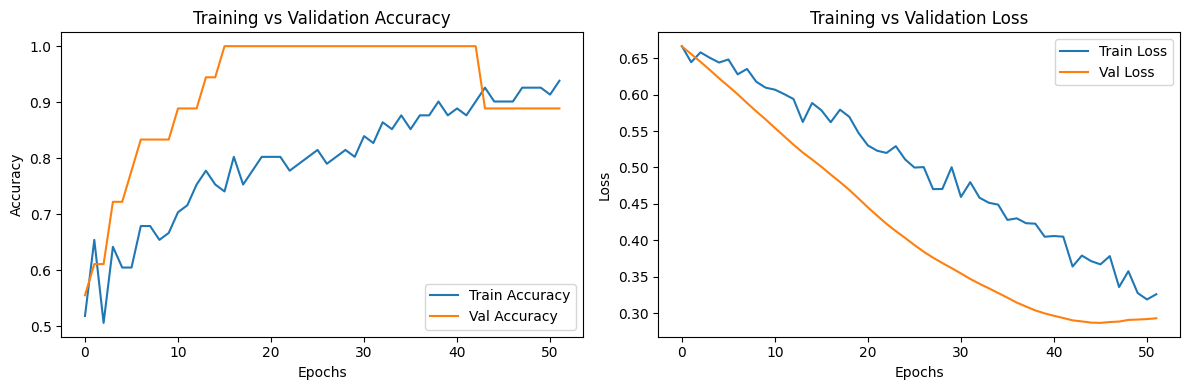

In [436]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()
# 🔵 Train Accuracy → performance on training data
# 🟠 Validation Accuracy → performance on unseen data

# Model is learning correctly
# ✅ Model generalizes well

In [448]:
y_test_prob = model.predict(X_test_scaled).ravel()
y_test_pred = (y_test_prob > 0.5).astype(int)

test_acc = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

print("Test Accuracy:", test_acc)
print("Test ROC-AUC :", test_auc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Test Accuracy: 0.8333333333333334
Test ROC-AUC : 0.8615384615384615


In [449]:
y_train_prob = model.predict(X_train_scaled).ravel()
y_train_pred = (y_train_prob > 0.5).astype(int)

train_acc = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_prob)
print("Train Accuracy:", train_acc)
print("Train ROC-AUC :", train_auc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Train Accuracy: 0.9259259259259259
Train ROC-AUC : 0.9325396825396826


In [450]:
print("\nTEST CLASSIFICATION REPORT")
print(classification_report(y_test, y_test_pred))



TEST CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.75      0.60      0.67         5

    accuracy                           0.83        18
   macro avg       0.80      0.76      0.78        18
weighted avg       0.83      0.83      0.83        18



In [451]:
print("\nTRAINING CLASSIFICATION REPORT")
print(classification_report(y_train, y_train_pred))



TRAINING CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        60
           1       0.83      0.90      0.86        21

    accuracy                           0.93        81
   macro avg       0.90      0.92      0.91        81
weighted avg       0.93      0.93      0.93        81



In [452]:
print("\nTEST CLASSIFICATION REPORT")
print(classification_report(y_test, y_test_pred))



TEST CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.75      0.60      0.67         5

    accuracy                           0.83        18
   macro avg       0.80      0.76      0.78        18
weighted avg       0.83      0.83      0.83        18



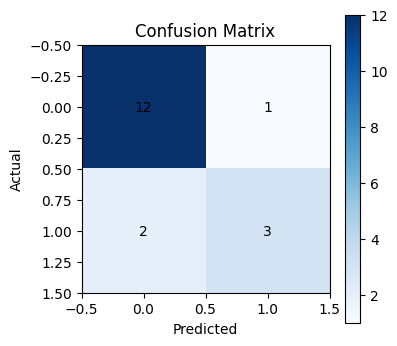

In [453]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


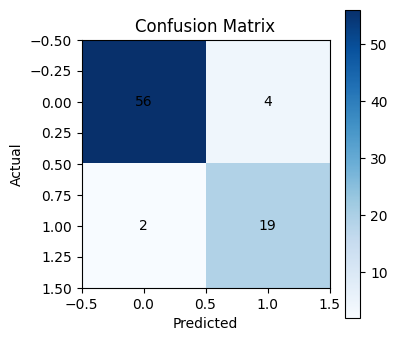

In [454]:
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(4,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [455]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1)

best_threshold = thresholds[best_idx]
print("Best threshold:", best_threshold)


Best threshold: 0.2343218


In [456]:
import os
os.makedirs("models", exist_ok=True)

model.save("models/icu_lstm_model.keras")
print("✅ LSTM model saved in native Keras format")


✅ LSTM model saved in native Keras format


In [457]:
import joblib
import os
joblib.dump(scaler, "models/lstm_scaler.pkl")
print("✅ Scaler fitted & saved")


✅ Scaler fitted & saved


In [5]:
from tensorflow.keras.models import load_model
import numpy as np

model = load_model("models/icu_lstm_model.keras")
print("✅ Model loaded")


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


✅ Model loaded


In [6]:
import joblib

scaler = joblib.load("models/lstm_scaler.pkl")
print("✅ Scaler loaded")


✅ Scaler loaded


In [7]:
def predict_sequence(seq_24xF, scaler, threshold=0.5):
    """
    seq_24xF: shape (24, num_features)
    """
    seq_flat = seq_24xF.reshape(-1, seq_24xF.shape[1])
    seq_scaled = scaler.transform(seq_flat).reshape(1, 24, -1)

    prob = model.predict(seq_scaled, verbose=0)[0][0]
    pred = int(prob >= threshold)

    return prob, pred


In [8]:
# Load clean LSTM data
X = np.load("X_lstm_clean.npy")
y = np.load("y_lstm_clean.npy")

# Pick a clear negative
neg_idx = np.where(y == 0)[0][0]
neg_seq = X[neg_idx]

prob, pred = predict_sequence(neg_seq, scaler)
print("NEGATIVE SAMPLE")
print("Predicted probability:", prob)
print("Predicted class:", pred)


NEGATIVE SAMPLE
Predicted probability: 0.31648663
Predicted class: 0


In [9]:
pos_idx = np.where(y == 1)[0][0]
pos_seq = X[pos_idx]

prob, pred = predict_sequence(pos_seq, scaler)
print("\nPOSITIVE SAMPLE")
print("Predicted probability:", prob)
print("Predicted class:", pred)



POSITIVE SAMPLE
Predicted probability: 0.82375395
Predicted class: 1


In [10]:
DEFAULTS = {
    "gcs": 15,
    "mean_bun": 15,
    "mean_sodium": 140,
    "mean_potassium": 4.2,
    "mean_hemoglobin": 13,
    "mean_wbc": 7,
    "mean_cholesterol_total": 180,
    "age": 60,
    "antibiotic_x": 0,
    "mean_hourly_urine": 60
}


In [11]:
FEATURE_COLS = [
    'heart_rate', 'resp_rate', 'temperature', 'spo2', 'gcs',
    'mean_glucose', 'mean_creatinine', 'mean_bun',
    'mean_sodium', 'mean_potassium',
    'mean_hemoglobin', 'mean_wbc',
    'mean_lactate', 'mean_ph',
    'mean_cholesterol_total', 'total_fluids',
    'age', 'vasopressor_x', 'sedative_x',
    'antibiotic_x', 'insulin_x',
    'mean_hourly_urine'
]


In [12]:
import numpy as np
import pandas as pd

def validate_and_prepare_case(row):
    warnings = []

    # ---- HARD FAIL CHECKS ----
    if row["HR"] <= 0 or row["HR"] > 300:
        return None, "Rejected: invalid HR"

    if row["MAP"] <= 0 or row["MAP"] > 200:
        return None, "Rejected: invalid MAP"

    if row["Resp_Rate"] <= 0:
        return None, "Rejected: invalid respiratory rate"

    if row["Temp"] < 30 or row["Temp"] > 43:
        return None, "Rejected: invalid temperature"

    if row["pH"] < 6.8 or row["pH"] > 7.8:
        return None, "Rejected: invalid pH"
    if row.isna().any():
        return None, "Rejected: unresolved NaN values"


    for med in ["Vasopressors", "Sedatives", "Insulin"]:
        if row[med] < 0:
            return None, f"Rejected: negative {med}"

    # ---- SOFT CLIPPING ----
    hr = np.clip(row["HR"], 30, 220)
    map_ = np.clip(row["MAP"], 40, 150)
    spo2 = np.clip(row["SpO2"], 70, 100)

    # ---- FLAG CLINICAL INCONSISTENCY ----
    if map_ > 160 and row["Vasopressors"] > 0:
        warnings.append("High MAP with vasopressors")

    # ---- BUILD FEATURE VECTOR ----
    features = {
        "heart_rate": hr,
        "resp_rate": row["Resp_Rate"],
        "temperature": row["Temp"],
        "spo2": spo2,
        "gcs": DEFAULTS["gcs"],
        "mean_glucose": row["Glucose"],
        "mean_creatinine": row["Creatinine"],
        "mean_bun": DEFAULTS["mean_bun"],
        "mean_sodium": DEFAULTS["mean_sodium"],
        "mean_potassium": DEFAULTS["mean_potassium"],
        "mean_hemoglobin": DEFAULTS["mean_hemoglobin"],
        "mean_wbc": DEFAULTS["mean_wbc"],
        "mean_lactate": row["Lactate"],
        "mean_ph": row["pH"],
        "mean_cholesterol_total": DEFAULTS["mean_cholesterol_total"],
        "total_fluids": row["Fluids"],
        "age": DEFAULTS["age"],
        "vasopressor_x": row["Vasopressors"],
        "sedative_x": row["Sedatives"],
        "antibiotic_x": DEFAULTS["antibiotic_x"],
        "insulin_x": row["Insulin"],
        "mean_hourly_urine": DEFAULTS["mean_hourly_urine"]
    }

    return features, " | ".join(warnings) if warnings else "OK"


In [13]:
def build_lstm_sequence(feature_dict):
    x = np.array([feature_dict[col] for col in FEATURE_COLS])
    seq = np.tile(x, (24, 1))  # (24, features)
    return seq


In [14]:
def run_test_case(row, model, scaler, threshold=0.5):

    base_output = {
        "TestCase_ID": row["TestCase_ID"],
        "Category": row["Category"],
        "Description": row["Description"],
        "Expected_Behavior": row["Expected_Behavior"]
    }

    features, status = validate_and_prepare_case(row)

    # ❌ Rejected case
    if features is None:
        return {
            **base_output,
            "Probability": "N/A",
            "Prediction": "REJECTED",
            "Validation_Status": status
        }

    # ✅ Valid case
    seq = build_lstm_sequence(features)
    seq_flat = seq.reshape(-1, seq.shape[1])
    seq_scaled = scaler.transform(seq_flat).reshape(1, 24, -1)

    prob = float(model.predict(seq_scaled, verbose=0)[0][0])
    pred = int(prob >= threshold)

    return {
        **base_output,
        "Probability": round(prob, 3),
        "Prediction": "Long Stay" if pred == 1 else "Short Stay",
        "Validation_Status": status
    }


In [15]:
test_cases = pd.DataFrame([
    [1,"Positive","Stable normal patient",75,85,98,16,36.8,7.38,1.2,110,0.9,0,0,50,0,"Normal prediction, no alerts"],
    [2,"Positive","ICU patient with controlled vasopressors",95,70,96,18,37.2,7.32,2.0,140,1.1,0.2,0.5,200,0,"Stable with intervention awareness"],
    [3,"Negative","Extremely high heart rate",350,90,98,20,37,7.35,1.6,120,1,0,0,60,0,"Reject or clip HR"],
    [4,"Negative","Negative vital values",-10,-20,95,-5,-2,7.2,1.8,100,0.8,0,0,40,0,"Input validation failure"],
    [5,"Negative","NaN values in labs",np.nan,85,97,16,36.7,np.nan,np.nan,115,0.9,0,0,70,0,"Graceful NaN handling"],
    [6,"Negative","Medication logic conflict",90,180,99,18,37.1,7.4,1.5,130,1,1,0,300,0,"Flag clinical inconsistency"],
    [7,"Negative","Negative medication values",85,75,98,16,36.8,7.36,1.3,110,0.9,-0.3,-0.2,100,-1,"Reject invalid meds"],
    [8,"Neutral","Upper physiological boundary",180,120,100,28,38.5,7.8,2.5,180,1.3,0,0,100,2,"Acceptable but cautious output"],
    [9,"Neutral","Time-series HR jump",0,80,97,16,36.9,7.4,1.4,105,1,0,0,80,0,"Handles anomaly smoothly"],
    [10,"Stress","Multi-organ failure scenario",220,40,88,32,39.5,6.9,8,300,3.5,1,0.8,500,10,"High-risk output"]
], columns=[
    "TestCase_ID","Category","Description","HR","MAP","SpO2","Resp_Rate",
    "Temp","pH","Lactate","Glucose","Creatinine",
    "Vasopressors","Sedatives","Fluids","Insulin","Expected_Behavior"
])


In [16]:
row = row.fillna({
    "HR": 75,
    "pH": 7.4,
    "Lactate": 1.5
})


NameError: name 'row' is not defined

In [17]:
results = []

for _, row in test_cases.iterrows():
    output = run_test_case(row, model, scaler, threshold=0.5)
    results.append(output)

results_df = pd.DataFrame(results)
results_df


,TestCase_ID,Category,Description,Expected_Behavior,Probability,Prediction,Validation_Status
0,1,Positive,Stable normal patient,"Normal prediction, no alerts",0.422,Short Stay,OK
1,2,Positive,ICU patient with controlled vasopressors,Stable with intervention awareness,0.414,Short Stay,OK
2,3,Negative,Extremely high heart rate,Reject or clip HR,N/A,REJECTED,Rejected: invalid HR
3,4,Negative,Negative vital values,Input validation failure,N/A,REJECTED,Rejected: invalid HR
4,5,Negative,NaN values in labs,Graceful NaN handling,N/A,REJECTED,Rejected: unresolved NaN values
5,6,Negative,Medication logic conflict,Flag clinical inconsistency,0.418,Short Stay,OK
6,7,Negative,Negative medication values,Reject invalid meds,N/A,REJECTED,Rejected: negative Vasopressors
7,8,Neutral,Upper physiological boundary,Acceptable but cautious output,0.463,Short Stay,OK
8,9,Neutral,Time-series HR jump,Handles anomaly smoothly,N/A,REJECTED,Rejected: invalid HR
9,10,Stress,Multi-organ failure scenario,High-risk output,0.4,Short Stay,OK


In [18]:
print(results_df.to_string(index=False))


 TestCase_ID Category                              Description                  Expected_Behavior Probability Prediction               Validation_Status
           1 Positive                    Stable normal patient       Normal prediction, no alerts       0.422 Short Stay                              OK
           2 Positive ICU patient with controlled vasopressors Stable with intervention awareness       0.414 Short Stay                              OK
           3 Negative                Extremely high heart rate                  Reject or clip HR         N/A   REJECTED            Rejected: invalid HR
           4 Negative                    Negative vital values           Input validation failure         N/A   REJECTED            Rejected: invalid HR
           5 Negative                       NaN values in labs              Graceful NaN handling         N/A   REJECTED Rejected: unresolved NaN values
           6 Negative                Medication logic conflict        Flag clinica

In [19]:
import pandas as pd
test_cases = pd.DataFrame([
    [1,"Positive","Stable normal patient",75,85,98,16,36.8,7.38,1.2,110,0.9,0,0,50,0,"Normal prediction, no alerts"],
    [2,"Positive","ICU patient with controlled vasopressors",95,70,96,18,37.2,7.32,2.0,140,1.1,0.2,0.5,200,0,"Stable with intervention awareness"],
    [3,"Negative","Extremely high heart rate",350,90,98,20,37,7.35,1.6,120,1,0,0,60,0,"Reject or clip HR"],
    [4,"Negative","Negative vital values",-10,-20,95,-5,-2,7.2,1.8,100,0.8,0,0,40,0,"Input validation failure"],
    [5,"Negative","NaN values in labs",np.nan,85,97,16,36.7,np.nan,np.nan,115,0.9,0,0,70,0,"Graceful NaN handling"],
    [6,"Negative","Medication logic conflict",90,180,99,18,37.1,7.4,1.5,130,1,1,0,300,0,"Flag clinical inconsistency"],
    [7,"Negative","Negative medication values",85,75,98,16,36.8,7.36,1.3,110,0.9,-0.3,-0.2,100,-1,"Reject invalid meds"],
    [8,"Neutral","Upper physiological boundary",180,120,100,28,38.5,7.8,2.5,180,1.3,0,0,100,2,"Acceptable but cautious output"],
    [9,"Neutral","Time-series HR jump",0,80,97,16,36.9,7.4,1.4,105,1,0,0,80,0,"Handles anomaly smoothly"],
    [10,"Stress","Multi-organ failure scenario",220,40,88,32,39.5,6.9,8,300,3.5,1,0.8,500,10,"High-risk output"]
], columns=[
    "TestCase_ID","Category","Description","HR","MAP","SpO2","Resp_Rate",
    "Temp","pH","Lactate","Glucose","Creatinine",
    "Vasopressors","Sedatives","Fluids","Insulin","Expected_Behavior"
])


In [20]:
row = row.fillna({
    "HR": 75,
    "MAP": 80,
    "Resp_Rate": 16,
    "Temp": 36.8,
    "SpO2": 97,
    "pH": 7.4,
    "Lactate": 1.5,
    "Glucose": 110,
    "Creatinine": 1.0,
    "Vasopressors": 0,
    "Sedatives": 0,
    "Fluids": 100,
    "Insulin": 0
})


In [21]:
warnings = []

if row["MAP"] > 160 and row["Vasopressors"] > 0:
    warnings.append("Clinical inconsistency: high MAP with vasopressors")


In [22]:
def generate_diet_plan(row):
    plan = []

    # Diabetes / Glucose
    if row["Glucose"] > 140 or row["Insulin"] > 15:
        plan.append("Low glycemic index foods (oats, whole grains)")
        plan.append("Avoid sugar, sweets, sweetened drinks")

    # Kidney
    if row["Creatinine"] > 1.5 or row.get("Urea_BUN", 0) > 40:
        plan.append("Low protein diet (avoid red meat)")
        plan.append("Restrict sodium and potassium")

    # Electrolytes
    if row.get("Potassium", 4) > 5.0:
        plan.append("Avoid high potassium foods (banana, spinach)")
    if row.get("Sodium", 140) > 145:
        plan.append("Low sodium diet")

    # Anemia
    if row.get("Hemoglobin", 13) < 11:
        plan.append("Iron-rich foods (spinach, legumes, dates)")
        plan.append("Vitamin C rich fruits")

    # Cholesterol
    if row.get("Cholesterol", 180) > 200:
        plan.append("Low fat diet, avoid fried foods")

    # Metabolic stress
    if row["Lactate"] > 2 or row["pH"] < 7.3:
        plan.append("Easily digestible foods (rice, soup)")
        plan.append("Avoid spicy and heavy meals")

    if not plan:
        plan.append("Balanced diet with fruits, vegetables, proteins")

    return "; ".join(plan)


In [23]:
final_results = []

for _, row in test_cases.iterrows():
    icu_output = run_test_case(row, model, scaler, threshold=0.5)

    # Diet plan only if not rejected
    if icu_output["Prediction"] != "REJECTED":
        diet = generate_diet_plan(row)
    else:
        diet = "N/A (invalid input)"

    icu_output["Diet_Plan"] = diet
    final_results.append(icu_output)

final_df = pd.DataFrame(final_results)
print(final_df.to_string(index=False))


 TestCase_ID Category                              Description                  Expected_Behavior Probability Prediction               Validation_Status                                                                                                                                                                                                                 Diet_Plan
           1 Positive                    Stable normal patient       Normal prediction, no alerts       0.422 Short Stay                              OK                                                                                                                                                                           Balanced diet with fruits, vegetables, proteins
           2 Positive ICU patient with controlled vasopressors Stable with intervention awareness       0.414 Short Stay                              OK                                                                                                          

In [52]:
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib.pagesizes import A2, landscape
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet


In [56]:
def save_results_to_pdf(df, file_name):
    styles = getSampleStyleSheet()

    pdf = SimpleDocTemplate(
        file_name,
        pagesize=landscape(A2),
        rightMargin=20,
        leftMargin=20,
        topMargin=20,
        bottomMargin=20
    )

    elements = []

    # Title
    elements.append(
        Paragraph(
            "<b>ICU LSTM Model – Test Case Results & Diet Recommendations</b>",
            styles["Title"]
        )
    )

    elements.append(Paragraph("<br/>", styles["Normal"]))

    # Convert dataframe rows to wrapped paragraphs
    table_data = []
    header = [Paragraph(f"<b>{col}</b>", styles["Normal"]) for col in df.columns]
    table_data.append(header)

    for _, row in df.iterrows():
        table_data.append([
            Paragraph(str(cell), styles["Normal"]) for cell in row
        ])

    # Column widths (adjusted for your data)
    col_widths = [
        60,   # TestCase_ID
        70,   # Category
        160,  # Description
        200,  # Expected_Behavior
        70,   # Probability
        90,   # Prediction
        180,  # Validation_Status
        260   # Diet_Plan
    ]

    table = Table(table_data, colWidths=col_widths, repeatRows=1)

    table.setStyle(TableStyle([
        ("BACKGROUND", (0, 0), (-1, 0), colors.lightgrey),
        ("GRID", (0, 0), (-1, -1), 0.5, colors.black),
        ("VALIGN", (0, 0), (-1, -1), "TOP"),
        ("ALIGN", (0, 0), (-1, 0), "CENTER"),
        ("FONTSIZE", (0, 0), (-1, -1), 8),
        ("BOTTOMPADDING", (0, 0), (-1, 0), 8),
    ]))

    elements.append(table)
    pdf.build(elements)


In [57]:
save_results_to_pdf(final_df, "ICU_LSTM_Test_Results.pdf")
